##  An pkl Model

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import joblib

In [2]:
load_iris().target_names.tolist()

['setosa', 'versicolor', 'virginica']

##### Loading dataset from scikit-learn datsets

In [3]:
iris = load_iris()

In [4]:
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


###### Trying to save indices of columns which helps in tracking the order of columns

In [6]:
features = iris['feature_names']
features


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.data.shape

(150, 4)

In [8]:
iris.target.shape

(150,)

In [9]:
iris.data.dtype

dtype('float64')

In [10]:
iris.target.dtype

dtype('int32')

In [11]:
X = iris.data
y = iris.target

##### Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [13]:
print('X_train:',X_train.shape,'\ny_train:',y_train.shape,'\nX_test:',X_test.shape,'\ny_test:',y_test.shape)

X_train: (105, 4) 
y_train: (105,) 
X_test: (45, 4) 
y_test: (45,)


##### Creating a Pipeline
<br>Pipeline helps to automate ML workflows which is a sequence of data to be transformed and correlated together in a model that can be tested and evaluated to achieve an outcome.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
rf = RandomForestClassifier(random_state=667)

In [16]:
pipe = Pipeline([('Scaler',sc), 
                 ('rf', rf)
                ])

##### Grid Search

In [17]:
#n_components = [2,5,7,9,10]

params_grid = {
    'rf__n_estimators': [3,5,10],
    'rf__max_depth': [3,5,7,9]
     }

In [18]:
estimator = GridSearchCV(pipe, params_grid,cv=5, n_jobs=1, scoring= 'r2')
estimator.fit(X_train,y_train)

print('Best parameters:',estimator.best_params_, '\n\nr2:',estimator.best_score_)


Best parameters: {'rf__max_depth': 3, 'rf__n_estimators': 3} 

r2: 0.9239495798319327


In [19]:
model = estimator.best_estimator_
model.fit(X_train,y_train)
accuracy = model.score(X_train,y_train)
print('r2 after parameter tuning',accuracy)


r2 after parameter tuning 0.9619047619047619


In [21]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy Test:",(accuracy_score(y_pred,y_test)))

Accuracy Test: 0.9555555555555556


In [22]:
y_pred

array([2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1,
       0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2,
       2])

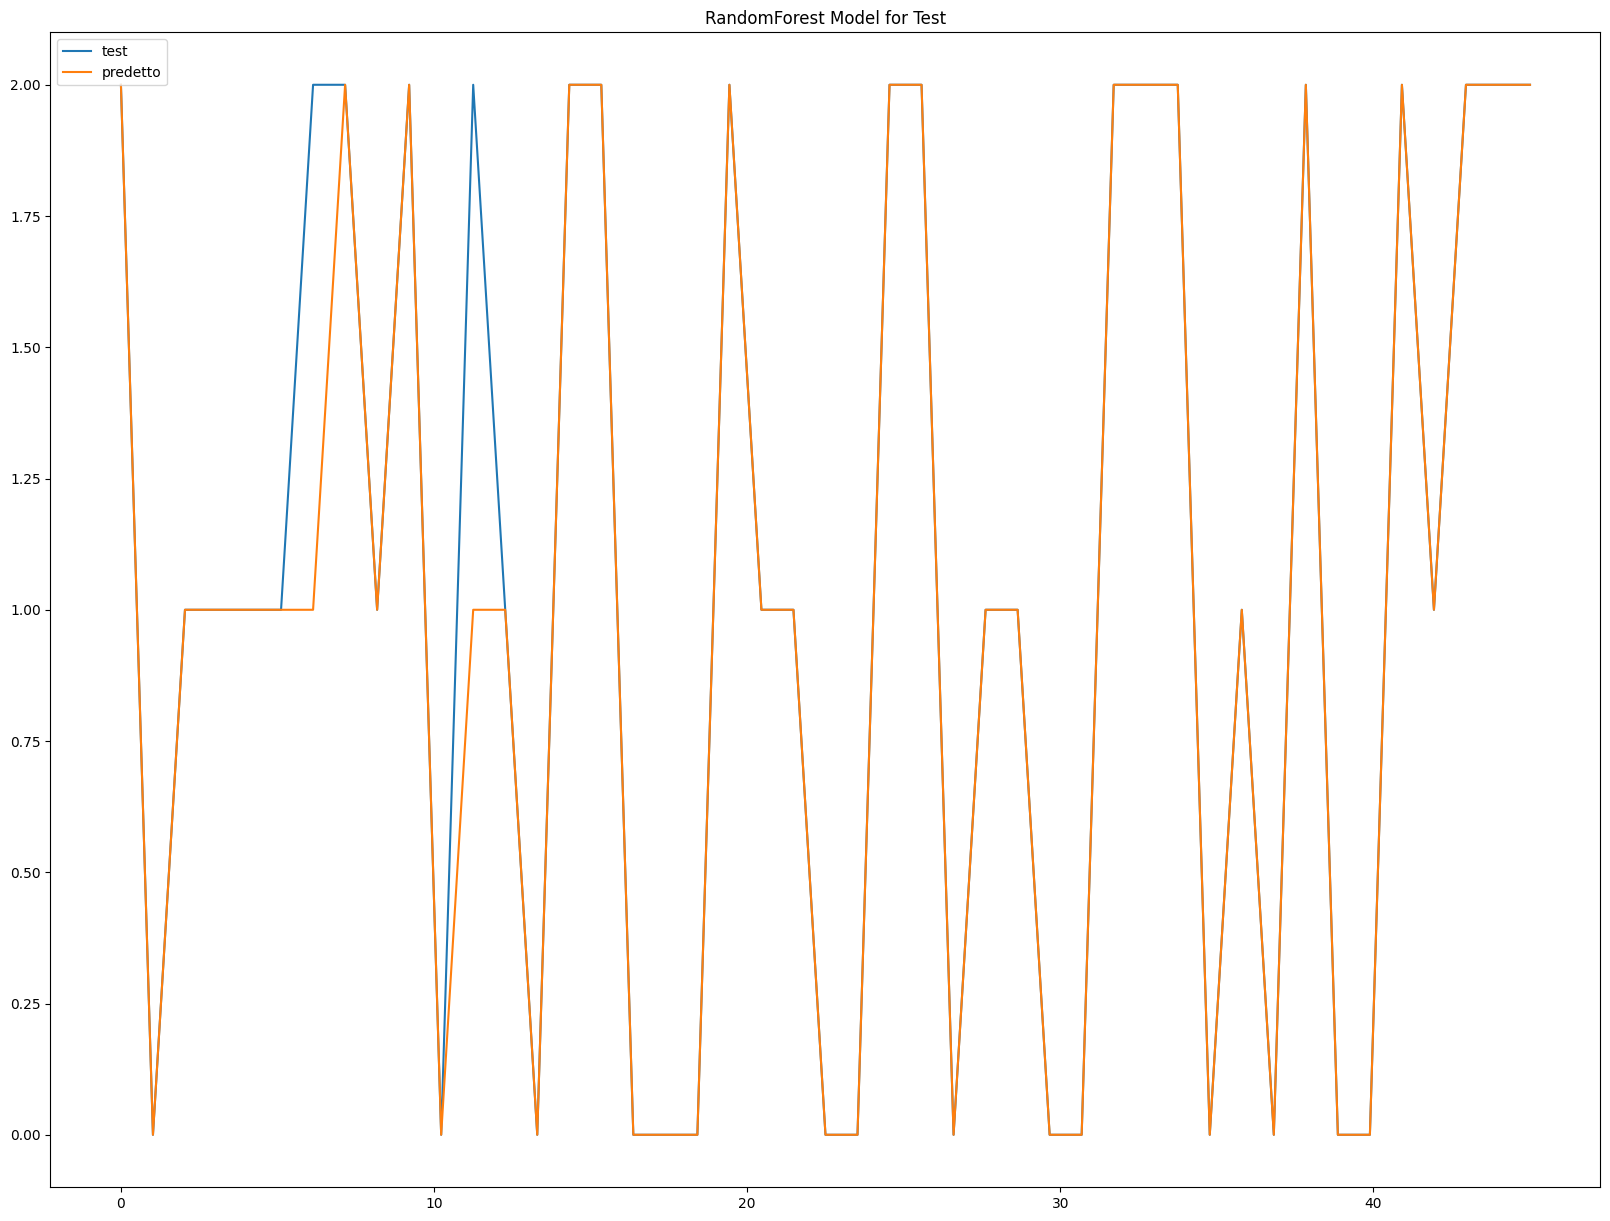

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

length = y_pred.shape[0] # 30 
x = np.linspace(0,length,length)

plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);
plt.title('RandomForest Model for Test')
plt.show()

In [24]:
joblib.dump(model,'model_iris.pkl')

['model_iris.pkl']